In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/ancova_data.csv")
df.head(2)

,genotype,height,yield
0,A,10.0,20.0
1,A,11.5,22.0


In [3]:
from dfply import *

In [4]:
df >> group_by(X.genotype) >> summarize(n=X['yield'].count(), mean=X['yield'].mean(), std=X['yield'].std())

,genotype,n,mean,std
0,A,10,25.17,2.577704
1,B,10,35.45,2.431849
2,C,10,17.73,2.039635


In [5]:
df >> group_by(X.genotype) >> summarize(n=X['height'].count(), mean=X['height'].mean(), std=X['height'].std())

,genotype,n,mean,std
0,A,10,13.790,2.224835
1,B,10,16.756,1.963960
2,C,10,9.600,1.840290


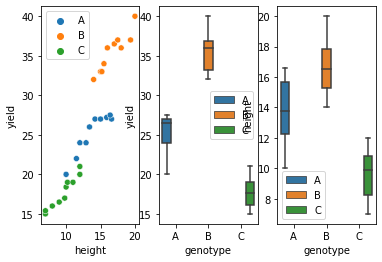

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="height", y="yield", hue=df.genotype.tolist(), ax=axs[0])
sns.boxplot(data=df, x="genotype", y="yield", hue=df.genotype.tolist(), ax=axs[1])
sns.boxplot(data=df, x="genotype", y="height", hue=df.genotype.tolist(), ax=axs[2])
plt.show()


In [7]:
#do the posthoc tests and the effect size metrics as a follow up by yourself
from pingouin import ancova
ancova(data=df, dv='yield', covar='height', between='genotype')

,Source,SS,DF,F,p-unc,np2
0,genotype,193.232458,2,141.352709,1.072947e-14,0.915777
1,height,132.695696,1,194.138152,1.429323e-13,0.881892
2,Residual,17.771304,26,NaN,NaN,NaN


In [10]:
dataset = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/student_scores.csv")

In [12]:
dataset.shape
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


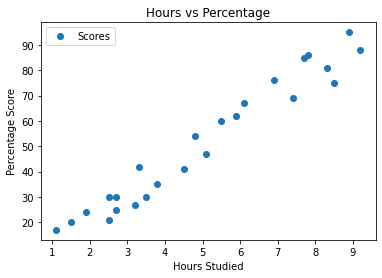

In [14]:
#plotting
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print(regressor.intercept_)

2.018160041434662


In [19]:
print(regressor.coef_)

[9.91065648]


In [20]:
#making predictions
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [23]:
#mlr example
dataset = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/petrol_consumption.csv")

In [24]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [25]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [26]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [30]:
y_pred = regressor.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168
